In [1]:
import pandas as pd
# %matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['figure.dpi'] = 100

In [10]:
semana = 'semana_2020_11_16'
rango_fechas = [x for x in range(16, 21)]
conteo_datos = {}
conteo_datos_dsl = {}

variable1 = 'Temp Interior'
abv1 = 'tint'
variable2 = 'Temp Exterior'
abv2 = 'text'
variable3 = 'Temperatura de Motor'
abv3 = 'tmot'
variable4 = 'Potencia Total Generada'
abv4 = 'ptg'
variable5 = 'Potencia Total Consumida'
abv5 = 'ptc'
variable6 = 'Odómetro'
abv6 = 'odom'

columnas_var = [f'valor_{x}' for x in [abv1, abv2, abv3, abv4, abv5, abv6]]
columnas_var2 = [f'valor_{x}' for x in [abv1, abv2, abv3, abv4, abv5, abv6]]
columnas_var2.append('Total_ele')
columnas_var2.append('Soc')
for var in columnas_var2:
    conteo_datos[var] = []


variable1 = 'Temperatura de Refrigerante'
abv1 = 'tref'
variable2 = 'Temperatura de Aceite'
abv2 = 'tac'
variable3 = 'Temperatura de Aire'
abv3 = 'tair'
variable4 = 'Temperatura Ambiente'
abv4 = 'tamb'
variable5 = 'AdBlue'
abv5 = 'adbl'
variable6 = 'Odómetro'
abv6 = 'odom'

columnas_var_dsl = [f'valor_{x}' for x in [abv1, abv2, abv3, abv4, abv5, abv6]]
columnas_var_dsl2 = [f'valor_{x}' for x in [abv1, abv2, abv3, abv4, abv5, abv6]]
columnas_var_dsl2.append('Total_dsl')
columnas_var_dsl2.append('Cons_Comb')
for var in columnas_var_dsl2:
    conteo_datos_dsl[var] = []
# valor_consc

for i in rango_fechas:
    fecha = f'2020_11_{i:02d}'
    nombre_fecha = fecha

    df_ele = pd.read_parquet(f'{semana}/data_Ttec_{fecha}.parquet')
    print(fecha, "numero registros electricos:", len(df_ele.index))
    conteo_datos['Total_ele'].append(len(df_ele.index))
    conteo_datos['Soc'].append(len(df_ele.loc[~df_ele['valor_soc'].isna()].index))
    print(f'Patentes con registro: {len(df_ele["patente"].unique())}')

    for var in columnas_var:
        print(var, len(df_ele.loc[~df_ele[var].isna()].index))
        conteo_datos[var].append(len(df_ele.loc[~df_ele[var].isna()].index))


    if False:
        df_ele = df_ele.loc[df_ele['geozona']=='None'].copy()
        print('Registros fuera de geocercas (en ruta)', len(df_ele.index))
        print(f'Patentes en ruta: {len(df_ele["patente"].unique())}')
        df_ele = df_ele.loc[~df_ele['valor_tint'].isna()].copy()
        print('y además con Temperatura no-nula', len(df_ele.index))
        print(f'y Patentes con T° no-nula: {len(df_ele["patente"].unique())}')

        df_ele["hora_evento_int"] = df_ele["hora_evento"].dt.total_seconds() / 3600

    if True:
        df_dsl = pd.read_parquet(f'{semana}/data_Ttec_dsl_{fecha}.parquet')
        print(fecha, "numero registros diesel:", len(df_dsl.index))
        print(f'Patentes con registro: {len(df_dsl["patente"].unique())}')

        conteo_datos_dsl['Total_dsl'].append(len(df_dsl.index))
        conteo_datos_dsl['Cons_Comb'].append(len(df_dsl.loc[~df_dsl['valor_consc'].isna()].index))
    
        for var in columnas_var_dsl:
            print(var, len(df_dsl.loc[~df_dsl[var].isna()].index))
            conteo_datos_dsl[var].append(len(df_dsl.loc[~df_dsl[var].isna()].index))

        df_dsl = df_dsl.loc[df_dsl['geozona']=='None'].copy()
        print('Registros fuera de geocercas (en ruta)', len(df_dsl.index))
        print(f'Patentes en ruta: {len(df_dsl["patente"].unique())}')

        df_dsl["hora_evento_int"] = df_dsl["hora_evento"].dt.total_seconds() / 3600
    print(' .  .  .  ')

2020_11_16 numero registros electricos: 68782
Patentes con registro: 218
valor_tint 8972
valor_text 8972
valor_tmot 8984
valor_ptg 68782
valor_ptc 68782
valor_odom 68759
2020_11_16 numero registros diesel: 106936
Patentes con registro: 336
valor_tref 106936
valor_tac 106936
valor_tair 106936
valor_tamb 106936
valor_adbl 106584
valor_odom 106576
Registros fuera de geocercas (en ruta) 80024
Patentes en ruta: 322
 .  .  .  
2020_11_17 numero registros electricos: 60155
Patentes con registro: 219
valor_tint 8054
valor_text 8054
valor_tmot 8065
valor_ptg 60155
valor_ptc 60155
valor_odom 60108
2020_11_17 numero registros diesel: 95835
Patentes con registro: 340
valor_tref 95835
valor_tac 95835
valor_tair 95835
valor_tamb 95835
valor_adbl 95516
valor_odom 95577
Registros fuera de geocercas (en ruta) 68994
Patentes en ruta: 326
 .  .  .  
2020_11_18 numero registros electricos: 69682
Patentes con registro: 221
valor_tint 9516
valor_text 9516
valor_tmot 9522
valor_ptg 69682
valor_ptc 69682
valo

In [11]:
df_conteo = pd.DataFrame.from_dict(conteo_datos)
df_conteo.reset_index(inplace=True)
df_conteo['index'] = df_conteo['index'] + rango_fechas[0]
df_conteo = pd.melt(df_conteo, id_vars=['index'], value_vars=columnas_var2)

df_conteo_dsl = pd.DataFrame.from_dict(conteo_datos_dsl)
df_conteo_dsl.reset_index(inplace=True)
df_conteo_dsl['index'] = df_conteo_dsl['index'] + rango_fechas[0]
df_conteo_dsl = pd.melt(df_conteo_dsl, id_vars=['index'], value_vars=columnas_var_dsl2)

df_conteo['Bus_Tipo'] ='E'
df_conteo_dsl['Bus_Tipo'] ='D'

df_aux_ele = df_conteo.loc[((df_conteo['variable']=='Total_ele') | (df_conteo['variable']=='valor_text'))]
df_aux_dsl = df_conteo_dsl.loc[((df_conteo_dsl['variable']=='Total_dsl') | (df_conteo_dsl['variable']=='valor_tamb'))]
df_conteo_ambos = pd.concat([df_aux_dsl, df_aux_ele])

df_conteo_ambos['variable'] = df_conteo_ambos['variable'].str.replace('valor_tamb', 'T°ambiente(dsl)')
df_conteo_ambos['variable'] = df_conteo_ambos['variable'].str.replace('valor_text', 'T°externa(ele)')
df_conteo_ambos.sort_values(by=['Bus_Tipo', 'variable', 'index'], inplace=True)  # afecta orden de barras

In [ ]:
df_conteo_ambos_mes = []

In [12]:
df_conteo_ambos_mes.append(df_conteo_ambos.copy())

(0.0, 73166.1)

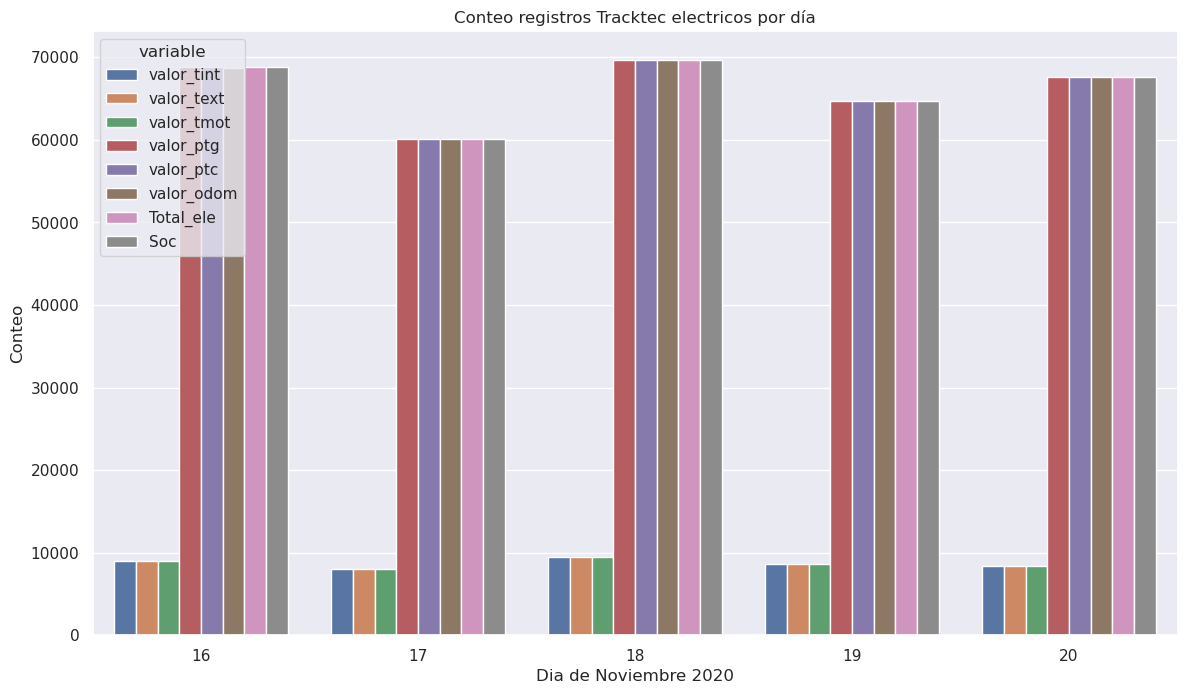

In [4]:
f, axes = plt.subplots(1, 1, figsize=(14, 8), sharex=True)
sns.barplot(data=df_conteo, x='index', y='value', hue='variable')
axes.set(xlabel='Dia de Noviembre 2020', ylabel='Conteo')
axes.set_title(f"Conteo registros Tracktec electricos por día")
plt.ylim(0)

(0.0, 121152.15)

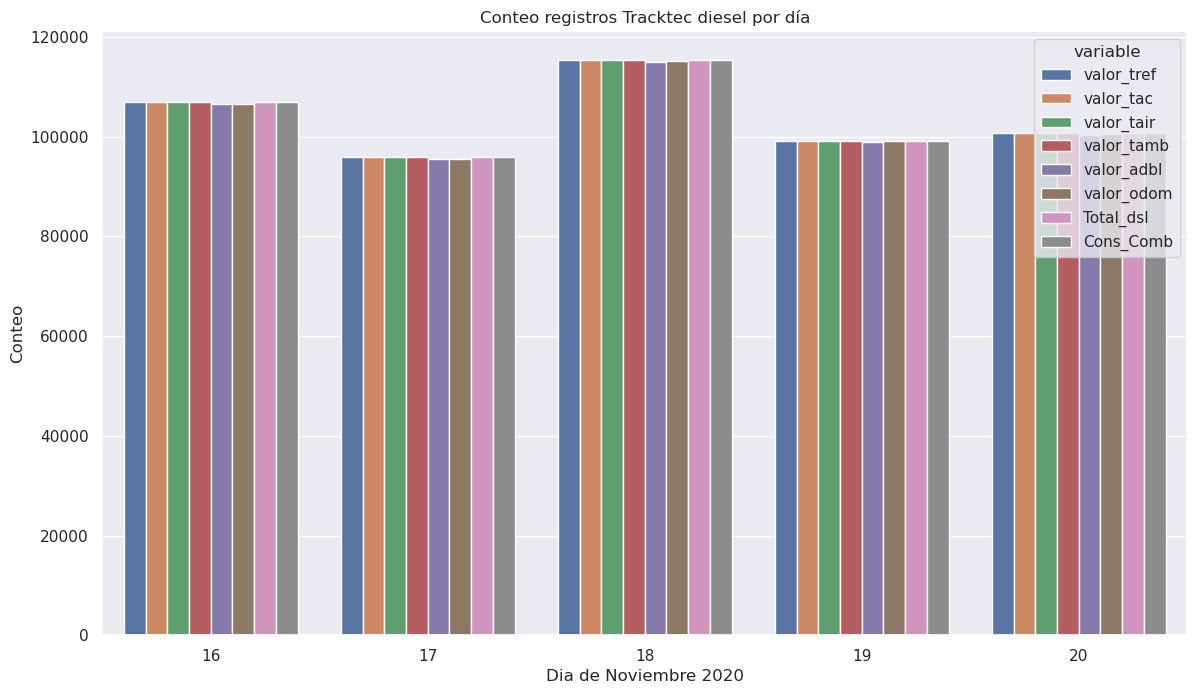

In [6]:
f, axes = plt.subplots(1, 1, figsize=(14, 8), sharex=True)
sns.barplot(data=df_conteo_dsl, x='index', y='value', hue='variable')
axes.set(xlabel='Dia de Noviembre 2020', ylabel='Conteo')
axes.set_title(f"Conteo registros Tracktec diesel por día")
plt.ylim(0)

(0.0, 121152.15)

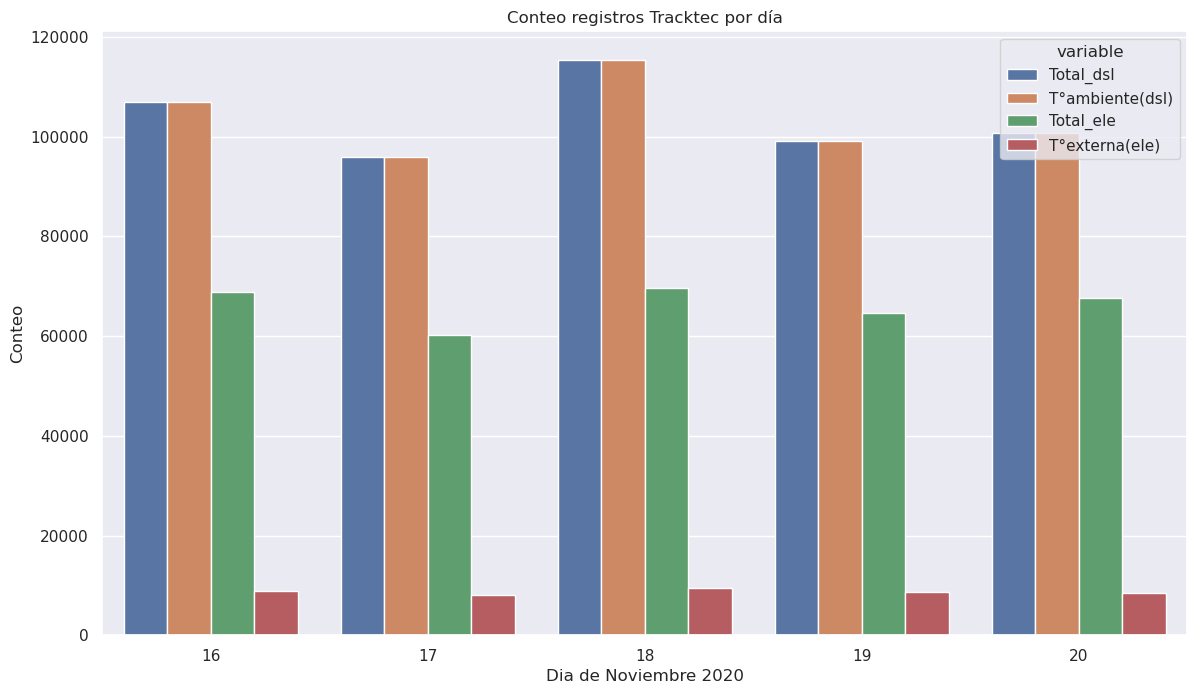

In [8]:
f, axes = plt.subplots(1, 1, figsize=(14, 8), sharex=True)
sns.barplot(data=df_conteo_ambos, x='index', y='value', hue='variable')
axes.set(xlabel='Dia de Noviembre 2020', ylabel='Conteo')
axes.set_title(f"Conteo registros Tracktec por día")
plt.ylim(0)

In [13]:
df_conteo_ambos_nov = pd.concat(df_conteo_ambos_mes)

In [14]:
df_conteo_ambos_nov.sort_values(by=['Bus_Tipo', 'variable', 'index'], inplace=True)  # afecta orden de barras
df_conteo_ambos_nov['variable'] = df_conteo_ambos_nov['variable'].str.replace('Total_dsl', 'Buses Diesel')
df_conteo_ambos_nov['variable'] = df_conteo_ambos_nov['variable'].str.replace('Total_ele', 'Buses Eléctricos')

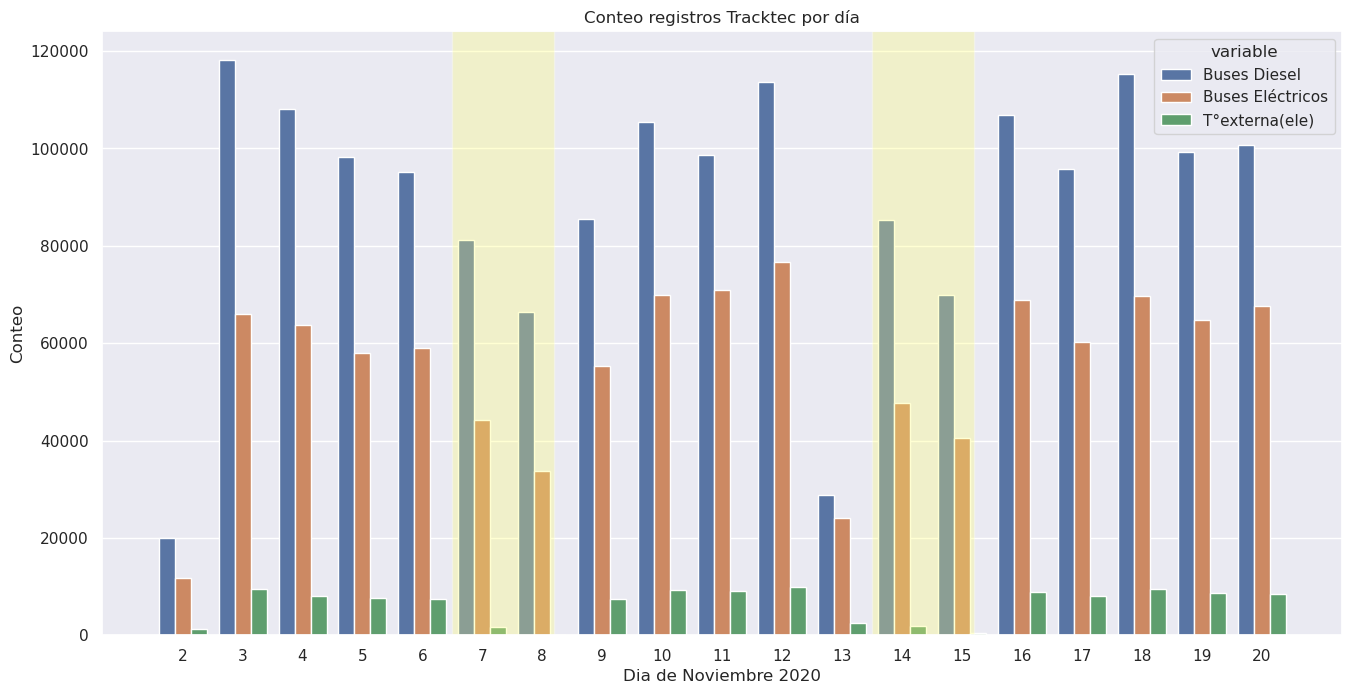

In [15]:
f, axes = plt.subplots(1, 1, figsize=(16, 8), sharex=True)
sns.barplot(data=df_conteo_ambos_nov.loc[df_conteo_ambos_nov['variable']!='T°ambiente(dsl)'], x='index', y='value', hue='variable')
axes.set(xlabel='Dia de Noviembre 2020', ylabel='Conteo')
axes.set_title(f"Conteo registros Tracktec por día")
plt.axvspan(4.5, 6.2, facecolor='#FFFF6F', alpha=0.3)
plt.axvspan(11.5, 13.2, facecolor='#FFFF6F', alpha=0.3)

In [16]:
df_aux_ele = df_conteo_ambos_nov.loc[df_conteo_ambos_nov['variable'] == 'Buses Eléctricos'].copy()
df_aux_dsl = df_conteo_ambos_nov.loc[df_conteo_ambos_nov['variable'] == 'Buses Diesel'].copy()
df_aux_ele.set_index('index', inplace=True)
df_aux_dsl.set_index('index', inplace=True)
df_aux_razon = df_aux_ele[['value']] / df_aux_dsl[['value']]

In [19]:
df_conteo_ambos_nov.to_parquet('data/df_conteo_ambos_nov.parquet', compression='gzip')

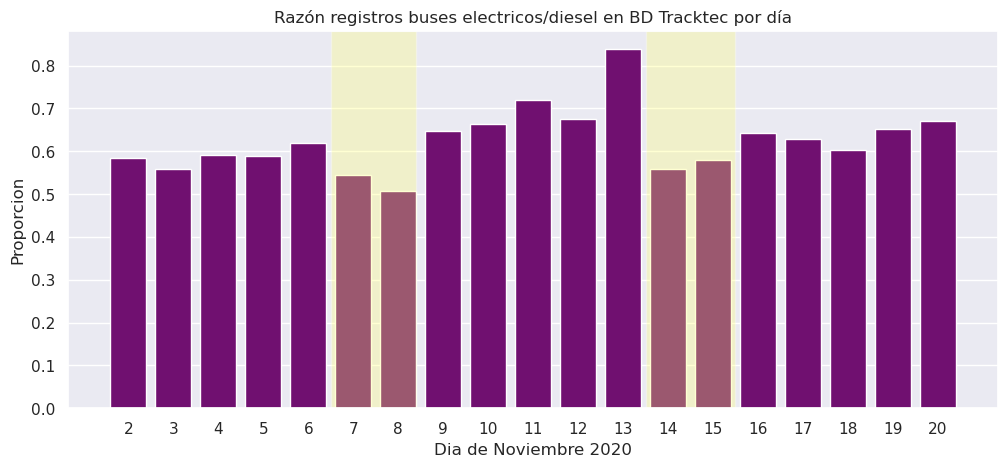

In [18]:
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.barplot(x=df_aux_razon.index, y=df_aux_razon['value'], color='purple')
axes.set(xlabel='Dia de Noviembre 2020', ylabel='Proporcion')
axes.set_title(f"Razón registros buses electricos/diesel en BD Tracktec por día")
plt.axvspan(4.5, 6.4, facecolor='#FFFF6F', alpha=0.3)
plt.axvspan(11.5, 13.5, facecolor='#FFFF6F', alpha=0.3)

In [21]:
# de aqui en adelante se saca registros por ppu
df_conteo_ppu_ambos_nov = pd.read_parquet('data/df_conteo_ppu_ambos_nov.parquet')

In [23]:
df_ppu_aux_ele = df_conteo_ppu_ambos_nov.loc[df_conteo_ppu_ambos_nov['variable'] == 'Buses Eléctricos'].copy()
df_ppu_aux_dsl = df_conteo_ppu_ambos_nov.loc[df_conteo_ppu_ambos_nov['variable'] == 'Buses Diesel'].copy()
df_ppu_aux_ele.set_index('index', inplace=True)
df_ppu_aux_dsl.set_index('index', inplace=True)

In [26]:
df_razon_ele = df_aux_ele[['value']] / df_ppu_aux_ele[['value']]

In [31]:
df_razon_dsl = df_aux_dsl[['value']] / df_ppu_aux_dsl[['value']]

In [32]:
df_razon_ele['Tipo_Bus'] = 'Eléctrico'
df_razon_dsl['Tipo_Bus'] = 'Diesel'

In [33]:
df_razon = pd.concat([df_razon_ele, df_razon_dsl])

In [42]:
df_razon

,value,Tipo_Bus
index,,
2,55.018868,Eléctrico
3,297.346847,Eléctrico
4,297.813084,Eléctrico
5,269.618605,Eléctrico
6,265.779279,Eléctrico
7,206.233645,Eléctrico
8,185.120879,Eléctrico
9,257.730233,Eléctrico
10,319.634703,Eléctrico


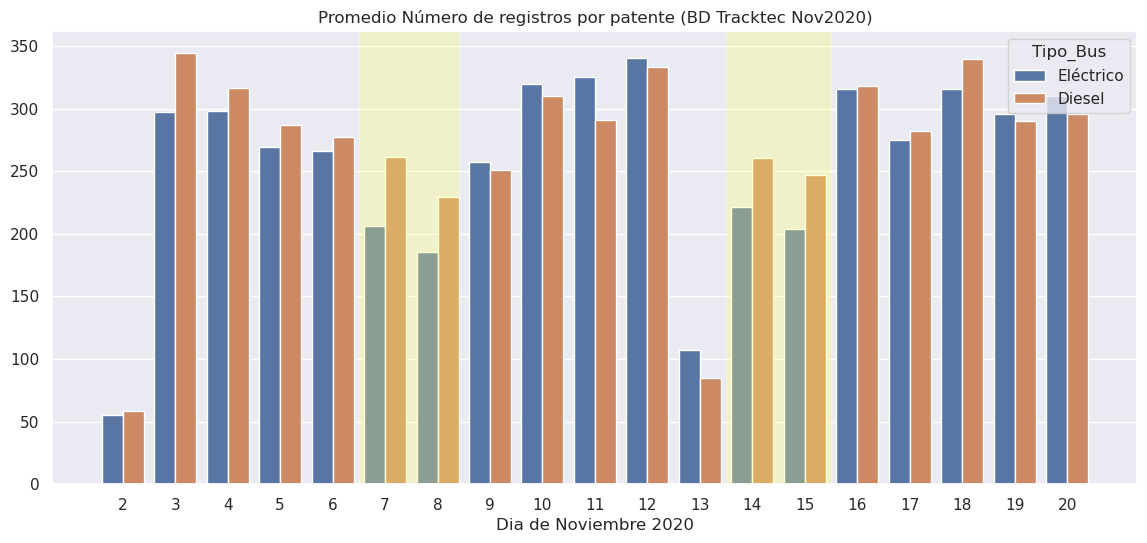

In [50]:
f, axes = plt.subplots(1, 1, figsize=(14, 6), sharex=True)
sns.barplot(data=df_razon, x=df_razon.index, y=df_razon['value'], hue='Tipo_Bus')
axes.set(xlabel='Dia de Noviembre 2020', ylabel='')
axes.set_title(f"Promedio Número de registros por patente (BD Tracktec Nov2020)")
plt.axvspan(4.5, 6.4, facecolor='#FFFF6F', alpha=0.3)
plt.axvspan(11.5, 13.5, facecolor='#FFFF6F', alpha=0.3)